In [1]:
import pandas as pd
import numpy as np

coach = pd.read_csv('coach_comments.csv')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vec = TfidfVectorizer()

In [3]:
## Coach vs Youtube comments

Adam_Levine=['Drew_Cole','Jackie_Verna','Mia_Boostrom','Reid_Umstattd']
Alicia_Keys=['Johnny_Bliss','Christiana_Danielle','Kelsea_Johnson','Terrence_Cunningham']
Blake_Shelton=['Austin_Giorgio','Gary_Edwards','Spensha_Baker','Wilkes']
Kelly_Clarkson=['Alexa_Cappelli','D.R._King','Dylan_Hartigan','Tish_Haynes_Keys']
experts={'Alicia_Keys':Alicia_Keys,'Adam_Levine':Adam_Levine,'Blake_Shelton':Blake_Shelton,'Kelly_Clarkson':Kelly_Clarkson}
data = {}
cosine_sim = {}
sim_comments = {}

for key,value in experts.items():
    for i in range(len(value)):
        df_name =value[i]
        data[df_name] = pd.read_csv('data_by_mentor\{}\{}.csv'.format(key,value[i]))
        c_s = coach[coach['singer']==df_name]
        c_s_ls = list(c_s['comment'])
        yt_ls = list(data[df_name]['commentText'].dropna())
        singer_ls = c_s_ls + yt_ls
        X = vec.fit_transform(singer_ls)
        S = cosine_similarity(X)
        cosine_sim[df_name] = S
        for j in range(len(c_s_ls)):
            index = [s for s in range(len(cosine_sim[df_name][j])) if cosine_sim[df_name][j][s] > 0.3]
            sim_comments[df_name] = [singer_ls[t] for t in index]

In [86]:
## Previous Stars vs Losers

previous = pd.read_csv('youtube_comments/previous_star.csv')
data_previous = {}
cosine_sim_previous = {}
sim_comments_previous = {}

for key,value in experts.items():
    for i in range(len(value)):
        df_name =value[i]
        data_previous[df_name] = pd.read_csv('data_by_mentor\{}\{}.csv'.format(key,value[i]))
        pre_ls = list(previous['commentText'].dropna())
        yt_ls = list(data_previous[df_name]['commentText'].dropna())
        singer_ls = pre_ls + yt_ls
        X = vec.fit_transform(singer_ls)
        S = cosine_similarity(X)
        cosine_sim_previous[df_name] = S
        for j in range(len(pre_ls)):
            index = [s for s in range(len(cosine_sim_previous[df_name][j])) if cosine_sim_previous[df_name][j][s] > 0.2]
            index1 = [d for d in index if d not in range(len(pre_ls))]
            sim_comments_previous[df_name] = [singer_ls[t] for t in index1]

In [100]:
length_dict = {key: len(value) for key, value in sim_comments_previous.items()}
length_dict

{'Johnny_Bliss': 5,
 'Christiana_Danielle': 37,
 'Kelsea_Johnson': 20,
 'Terrence_Cunningham': 10,
 'Drew_Cole': 4,
 'Jackie_Verna': 9,
 'Mia_Boostrom': 6,
 'Reid_Umstattd': 2,
 'Austin_Giorgio': 15,
 'Gary_Edwards': 4,
 'Spensha_Baker': 6,
 'Wilkes': 14,
 'Alexa_Cappelli': 6,
 'D.R._King': 9,
 'Dylan_Hartigan': 2,
 'Tish_Haynes_Keys': 2}

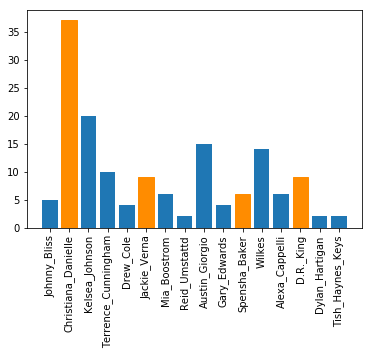

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

barlist = plt.bar(range(len(length_dict)), list(length_dict.values()), align='center')
for i in [1,5,10,13]:
    barlist[i].set_color('darkorange')
plt.xticks(range(len(length_dict)), list(length_dict.keys()), rotation='vertical')
plt.show()

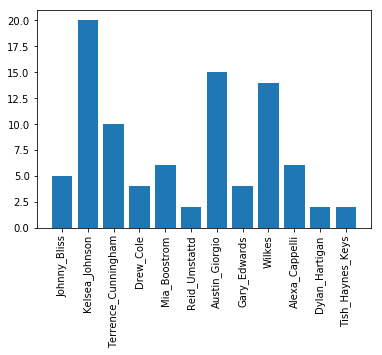

In [102]:
winner = ['Jackie_Verna','Christiana_Danielle', 'Spensha_Baker', 'D.R._King']
for i in winner:
    del length_dict[i]
plt.bar(range(len(length_dict)), list(length_dict.values()), align='center')
plt.xticks(range(len(length_dict)), list(length_dict.keys()), rotation='vertical')
plt.show()